# QWERTY effect for YouTube videos

ETH and QCRI dataset: https://storage.sg.ethz.ch/users/aabisheva/2013_YouTube_Twitter_ETH_QCRI/index.html
- Who Watches (and Shares) What on YouTube? And When? Using Twitter to Understand YouTube Viewership. Adiya Abisheva, Venkata Rama Kiran Garimella, David Garcia, Ingmar Weber. In Proceedings of the International Conference on Web Search and Data Mining (2014), pp. 593–602.

In [2]:
require(xtable,quietly = T)
source("DecodingFunctions.R")
options(warn=-1)

dsname <- "YouTube"
msg <- "YouTube videos"
load("YouTube/df1.RData")
load("YouTube/df2.RData")
load("YouTube/df3.RData")
load("YouTube/df4.RData")
df <- rbind(df1,df2,df3,df4)

In [3]:
nprods <- length(df$V)
nratings <- sum(as.numeric(df$nR))
avgRating <- mean(df$V)
avgRSR <- mean(df$RSR)
dfstats <- data.frame(nprods, nratings, avgRating, avgRSR)
  colnames(dfstats) <- c("Number of videos", "Number of evaluations", "Mean likes ratio", "mean RSR")
  row.names(dfstats) <- ""

xtable(x=dfstats, caption=paste("Data summary for", msg), digits=10, comment=FALSE)

,Number of videos,Number of evaluations,Mean likes ratio,mean RSR
,3292153,3495284940,0.9423953,0.4294281


In [3]:
#Run this only if you have time!
linModels(df, dsname)

In [ ]:
#Run this only if you have time!
rndLinModels(df, dsname, nrep=10000, verbose=FALSE)
bootLinModels(df, dsname, nrep=10000, verbose=FALSE)

In [4]:
#Run this only if you have time!
calcPlotDataSimple(df, dsname)
runsfolder <- paste(dsname, "rundata", sep="-")
load(file=paste(runsfolder, "PlotDataSimple.RData", sep="/"))
load(file=paste(runsfolder, "RndEsts.RData", sep="/"))
load(file=paste(runsfolder, "Boot.RData", sep="/"))

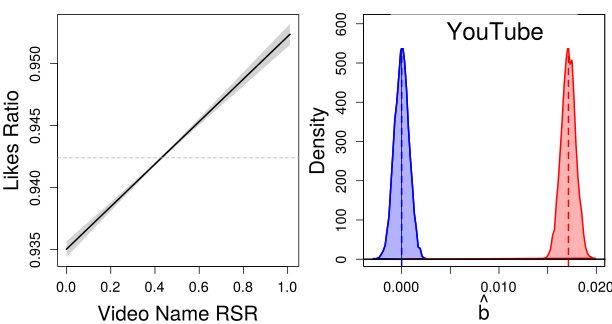

In [5]:
options(repr.plot.width=8.5, repr.plot.height=4.5)
options(jupyter.plot_mimetypes = 'image/svg+xml')
plotLM(plotData, rests, bests, xlab="Video Name RSR", ylab="Likes Ratio", booted=TRUE, coords=c(mean(df$RSA), mean(df$V)))
legend(x="top","YouTube", box.lty=0, box.lwd=0, bg="white", cex=2)

In [6]:
dfcontrols <- data.frame(df$nameLen, df$nwords, df$avgLetterFreq, df$avgWordFreq, df$nR, df$views, df$comments, df$ts)
linModelsControl(df$V, df$RSR, dfcontrols, dsname)

In [7]:
load(paste(runsfolder,"LinModel.RData", sep="/"))
load(paste(runsfolder,"LinModelNorm.RData", sep="/"))
load(file=paste(runsfolder,"LinModelRobust.RData",sep="/"))
load(file=paste(runsfolder,"LinModelControl.RData",sep="/"))

In [8]:
suppressMessages(library(stargazer))

names(linModel$coefficients) <- c( "1", "RSR")
names(linModelNorm$coefficients) <- c( "1", "RSR")
names(linModelRobust$coefficients) <- c( "1", "RSR")
names(linModelControl$coefficients) <- c( "1", "RSR")

Controls: number of letters, average letter frequency, number of words, average word frequency, number of views, number of comments, number of evaluations, date

In [9]:
stargazer(linModel, linModelNorm, linModelRobust,linModelControl, style="asr", digits=4, keep.stat=c("rsq", "n"), model.numbers=F, omit.table.layout="dm", column.labels=c("OLS", "Normalized", "Robust (MM)", "Residualized"), title=paste("Regression results for", msg), digit.separator=".", type="text")


Regression results for YouTube videos
-------------------------------------------------
       OLS    Normalized Robust (MM) Residualized
-------------------------------------------------
1   0.9350***  -0.0000    0.9836***   -0.0047*** 
RSR 0.0171*** 0.0127***   0.0007***   0.0109***  
N   3.292.153 3.292.153   3.292.153   3.292.153  
R2   0.0002     0.0002     0.00001      0.0001   
-------------------------------------------------
*p < .05; **p < .01; ***p < .001                 


In [10]:
load(file=paste(runsfolder,"LinModel.RData",sep="/"))
load(file=paste(runsfolder,"LinModelRobust.RData",sep="/"))
load(file=paste(runsfolder,"RndEsts.RData",sep="/"))
load(file=paste(runsfolder,"Boot.RData",sep="/"))
load(file=paste(runsfolder,"SpearmanBoot.RData",sep="/"))
statsTable(dsname, linModel, bests, rests, rhoests, linModelRobust, msg=msg)

,t test p-value,bootstrap p-value,permutation p-value,Spearman p-value,robust p-value
,2.658466e-117,0,0,0,1.10395e-06
